<a href="https://colab.research.google.com/github/anamunoz01/AA_PRACTICA2_GRUPO_10/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 2**

GRUPO 10

Elena Gómez

Ana Muñoz

importamos los paquetes necesarios para el prblema


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

2.7.0


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.np_utils import to_categorical

Importamos datos

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Modificamos los datos 

In [ ]:
print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

In [ ]:
print (train_images[0])

### MODELO 1

Creamos el modelo 1

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.summary()

In [ ]:
model1.add(Conv2D(64, (5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.summary()

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.summary()

Compilamos y entrenamos el modelo 1

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=5, batch_size=100)

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1)

Epoch 1/5
600/600 [==============================] - 34s 7ms/step - loss: 1.1642 - accuracy: 0.6095
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6629 - accuracy: 0.7576
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5813 - accuracy: 0.7881
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5292 - accuracy: 0.8092
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4956 - accuracy: 0.8265
Test accuracy: 0.8264999985694885


Modelo 1 25 epocas

In [ ]:
model11 = Sequential()
model11.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model11.add(MaxPooling2D((2, 2)))

model11.add(Conv2D(64, (5, 5), activation='relu'))
model11.add(MaxPooling2D((2, 2)))

model11.add(Flatten())
model11.add(Dense(10, activation='softmax'))
model11.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
model11.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model11.fit(train_images, train_labels, epochs=25, batch_size=100)

test_loss11, test_acc11 = model11.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc11)

Epoch 1/25
600/600 [==============================] - 5s 7ms/step - loss: 1.1845 - accuracy: 0.6118
Epoch 2/25
600/600 [==============================] - 4s 7ms/step - loss: 0.6624 - accuracy: 0.7580
Epoch 3/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5796 - accuracy: 0.7895
Epoch 4/25
600/600 [==============================] - 4s 6ms/step - loss: 0.5325 - accuracy: 0.8081
Epoch 5/25
600/600 [==============================] - 4s 6ms/step - loss: 0.4999 - accuracy: 0.8225
Epoch 6/25
600/600 [==============================] - 4s 6ms/step - loss: 0.4749 - accuracy: 0.8311
Epoch 7/25
600/600 [==============================] - 4s 6ms/step - loss: 0.4538 - accuracy: 0.8409
Epoch 8/25
600/600 [==============================] - 4s 6ms/step - loss: 0.4388 - accuracy: 0.8463
Epoch 9/25
600/600 [==============================] - 4s 6ms/step - loss: 0.4252 - accuracy: 0.8502
Epoch 10/25
600/600 [==============================] - 4s 6ms/step - loss: 0.4128 - accuracy: 0.8555

Caso 1 funcion tanh

In [ ]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), activation='tanh'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))
model12.summary()

In [ ]:
model12.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model12.fit(train_images, train_labels, epochs=5, batch_size=100)

test_loss12, test_acc12 = model12.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc12)

Epoch 1/5
600/600 [==============================] - 5s 7ms/step - loss: 1.1236 - accuracy: 0.6445
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6664 - accuracy: 0.7585
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5847 - accuracy: 0.7867
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5352 - accuracy: 0.8060
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5084 - accuracy: 0.8163
Test accuracy: 0.8162999749183655


Predicciones imagen 6

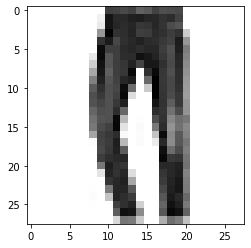

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
#????
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#from keras.utils.np_utils import to_categorical

print(test_labels)
#test_labels = to_categorical(test_labels)
print(test_labels)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [ ]:
import numpy as np
predictions1 = model1.predict(test_images)
print(np.argmax(predictions1[5]))
print(predictions1[5])
np.sum(predictions1[5])
print(predictions1)

1
[5.4480357e-04 9.9928975e-01 1.3988278e-05 6.3910084e-05 6.0985178e-05
 2.6579306e-07 2.4109468e-05 6.2190901e-09 2.1979185e-06 2.7242031e-10]
[[6.17789567e-07 1.59466911e-08 3.96300948e-06 ... 1.75780296e-01
  1.06026616e-03 8.03232372e-01]
 [3.28528299e-03 2.42474869e-07 9.55339193e-01 ... 1.12535528e-08
  4.01119323e-05 7.04076175e-09]
 [8.49807657e-06 9.99984741e-01 2.84137172e-07 ... 8.40746917e-10
  5.07158369e-08 1.39603945e-11]
 ...
 [9.50693246e-03 9.78162348e-07 1.75824168e-03 ... 1.08529139e-05
  9.43546832e-01 5.10439031e-06]
 [1.26522995e-04 9.91686881e-01 9.22899835e-06 ... 9.86637019e-07
  3.19715809e-06 1.28166471e-06]
 [2.01991861e-04 2.75666534e-05 7.55112793e-04 ... 4.39609289e-01
  3.44363339e-02 5.63430451e-02]]


graficamos prediccion

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

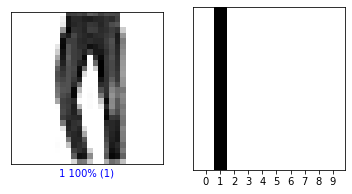

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

predicciones de las 14 primeras

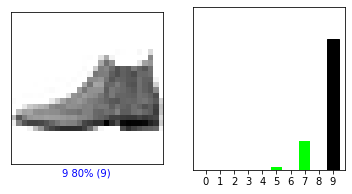

<Figure size 432x288 with 0 Axes>

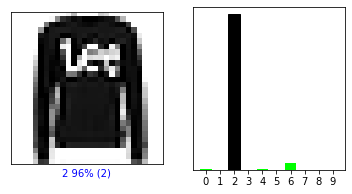

<Figure size 432x288 with 0 Axes>

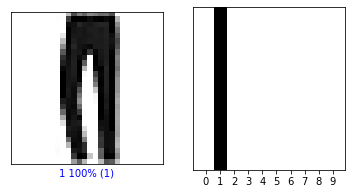

<Figure size 432x288 with 0 Axes>

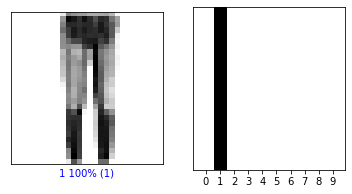

<Figure size 432x288 with 0 Axes>

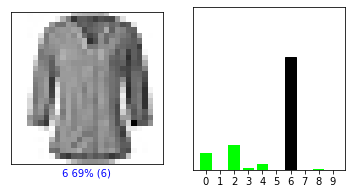

<Figure size 432x288 with 0 Axes>

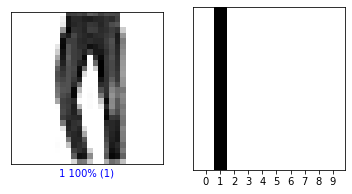

<Figure size 432x288 with 0 Axes>

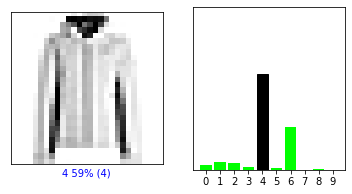

<Figure size 432x288 with 0 Axes>

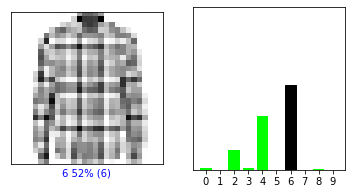

<Figure size 432x288 with 0 Axes>

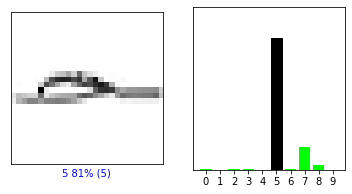

<Figure size 432x288 with 0 Axes>

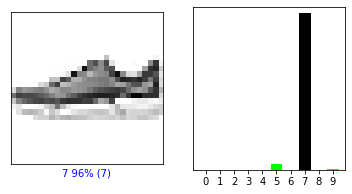

<Figure size 432x288 with 0 Axes>

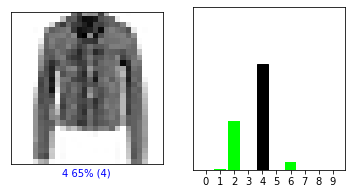

<Figure size 432x288 with 0 Axes>

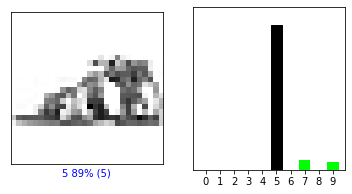

<Figure size 432x288 with 0 Axes>

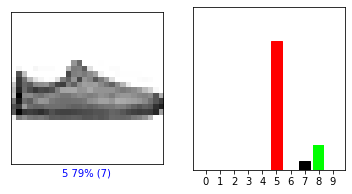

<Figure size 432x288 with 0 Axes>

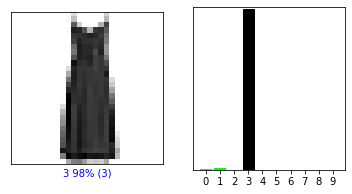

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions1[i],  test_labels)
    plt.show()
    plt.clf()